<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Setting-up-variables" data-toc-modified-id="Setting-up-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up variables</a></span></li><li><span><a href="#Setting-up-functions" data-toc-modified-id="Setting-up-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting up functions</a></span></li><li><span><a href="#Trying-with-iterations" data-toc-modified-id="Trying-with-iterations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trying with iterations</a></span></li><li><span><a href="#Try-some-plots" data-toc-modified-id="Try-some-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Try some plots</a></span><ul class="toc-item"><li><span><a href="#Test-with-k-(n_results)" data-toc-modified-id="Test-with-k-(n_results)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test with k (n_results)</a></span><ul class="toc-item"><li><span><a href="#Test-with-exponential-distribution" data-toc-modified-id="Test-with-exponential-distribution-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Test with exponential distribution</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></li><li><span><a href="#Test-with-m-(n_queries)" data-toc-modified-id="Test-with-m-(n_queries)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test with m (n_queries)</a></span><ul class="toc-item"><li><span><a href="#Test-with-lienar-distribution" data-toc-modified-id="Test-with-lienar-distribution-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Test with lienar distribution</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>Task 2</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Now-we-make-a-integrated-subplots" data-toc-modified-id="Now-we-make-a-integrated-subplots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Now we make a integrated subplots</a></span><ul class="toc-item"><li><span><a href="#Defining-a-subplot/full-plot-function" data-toc-modified-id="Defining-a-subplot/full-plot-function-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Defining a subplot/full plot function</a></span></li><li><span><a href="#Setting-the-variables-used-in-function" data-toc-modified-id="Setting-the-variables-used-in-function-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Setting the variables used in function</a></span></li><li><span><a href="#Call-the-function" data-toc-modified-id="Call-the-function-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Call the function</a></span></li></ul></li></ul></div>

# Importing modules

In [74]:
import time
import os
import os.path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import call, run, check_output

# Setting up variables

In [75]:
queries = [] # all the queries

for file in os.listdir("./data"):
    if file.endswith(".txt"):
        queries.append(file[:-4])

In [76]:
# number of iterations
n_iter = 10

# k
# default n_result
n_results = 20
# 1000, 2000, ...., 100000
lin_n_results = np.arange(1000, 100000, 1000)

# +5 here because I want to explore when the n_results gets larger than
# n_documents, how does the program behave, default should be +2
exp_n_results = np.concatenate([[0], 
                                np.logspace(0, int(np.log2(1e+5))+3,
                                            base=2)], axis=0)
# 0, 2, 4, 8, 16... 131072

# m
lin_n_queries = np.arange(0, len(queries), 10)


#t
tasks = np.array([1, 2])

# Setting up functions

In [77]:
"""
get a random subset from list
"""
def get_subset(queries, nele=5):
    return np.random.choice(queries, nele)
    
"""
print formatted result with newlines
"""
def check_result(*args, **kwargs):
    print(str(check_output(format_input(*args, **kwargs)), 'utf-8'))
    
"""
************************************************************************
make a formatted inputs.
task: integer of the task number 
n_results: integer of number of result to display
file: the location of executable a1
*queries: queries used in program
************************************************************************
"""
def format_input(task, n_results, *queries, file="./a1"):
    return [file, "-t", str(task), "-r", str(n_results), *queries]

"""
make a formatted run and return time it takes to execute
"""
def time_run(n_iter, *args, **kwargs):
    dts = 0
    for i in range(n_iter):
        t1 = time.time()
#         print(format_input(*args, **kwargs))
        run(format_input(*args, **kwargs))
        dts += (time.time()-t1)
    return dts/n_iter*1000

"""
format output of time_run same as %timeit
"""
def formatted_time_run(n_iter, *args, **kwargs):
    t = time_run(n_iter, *args, **kwargs)
    print("{} loops, {:.2f} ms per loop".format(n_iter, t))

# Trying with iterations

If any of the following printed result is 1. Means your program has bugs in it!

In [92]:
print("task1")
print(call(["./a1", "-t", "1", "-r", "10000", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "1", "-r", "0", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "1", "-r", "100000", "algorithms"]))
print(call(["./a1", "-t", "1", "-r", "1000000", "algorithms"]))
print("task2")
print(call(["./a1", "-t", "2", "-r", "10000", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "2", "-r", "0", "algorithms", "are", "fun"]))
print(call(["./a1", "-t", "2", "-r", "100000", "algorithms"]))
print(call(["./a1", "-t", "2", "-r", "1000000", "algorithms"]))

task1
0
0
0
0
task2
0
0
0
0


Try some sample iterations

In [93]:
formatted_time_run(30, 1, 10000, "algorithms", "are", "fun")
formatted_time_run(30, 2, 10000, "algorithms", "are", "fun")
%timeit run(["./a1", "-t", "1", "-r", "10000", "algorithms", "are", "fun"])
%timeit run(["./a1", "-t", "2", "-r", "10000", "algorithms", "are", "fun"])

30 loops, 116.71 ms per loop
30 loops, 124.62 ms per loop
10 loops, best of 3: 103 ms per loop
10 loops, best of 3: 98.6 ms per loop


# Try some plots
These are for tests, the formal plot are below.
check doc string of the parsed functions

## Test with k (n_results)

### Test with exponential distribution

In [95]:
subset1 = get_subset(queries)
subset1  # This is the queries used to test program

array(['power', 'and', 'which', 'car', 'april'], dtype='<U14')

#### Task 1

In [96]:
y_expk_1 = []
for i in exp_n_results:
    y_expk_1.append(time_run(n_iter, 1, i, *subset1))

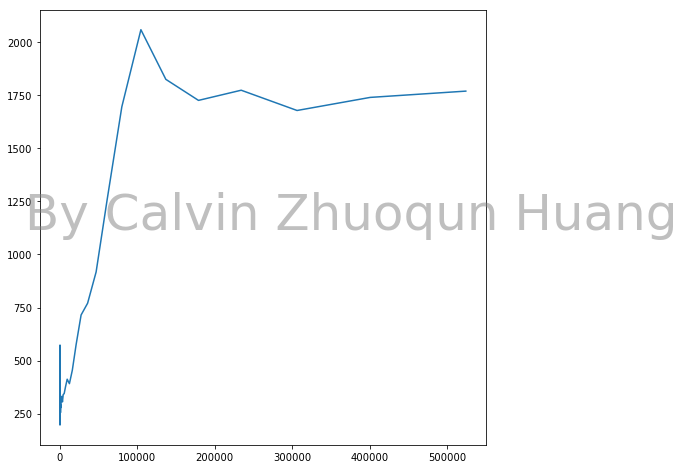

In [97]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_1)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

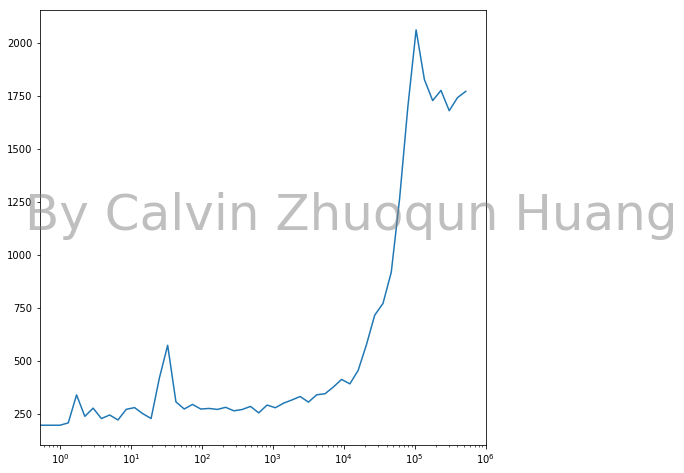

In [98]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_1)
plt.xscale("log")
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

#### Task 2

In [99]:
y_expk_2 = []

for i in exp_n_results:
    y_expk_2.append(time_run(n_iter, 2, i, *subset1))

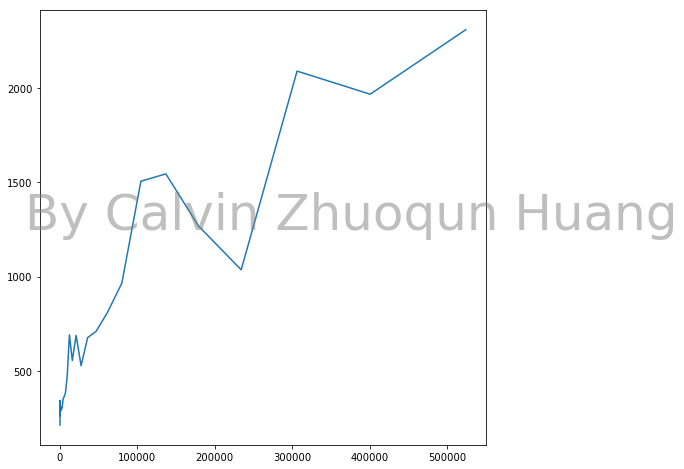

In [100]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_2)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

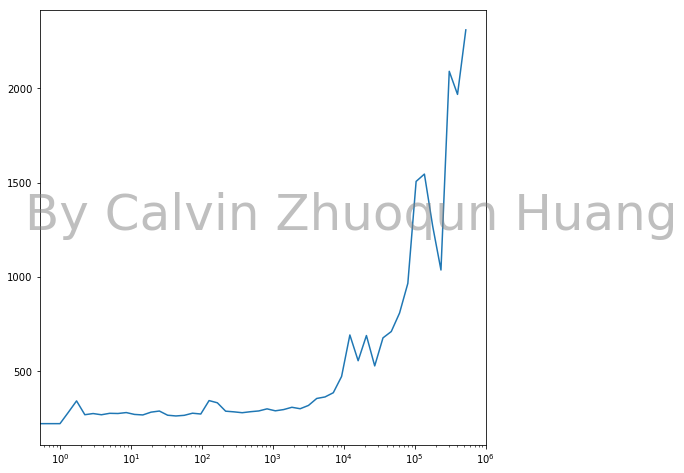

In [101]:
fig = plt.figure(figsize=[8,8])
plt.plot(exp_n_results, y_expk_2)
plt.xscale("log")
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

## Test with m (n_queries)

### Test with lienar distribution

#### Task 1

In [102]:
y_linm_1 = []
for i in lin_n_queries:
    y_linm_1.append(time_run(5, 1, n_results, *get_subset(queries, i)))

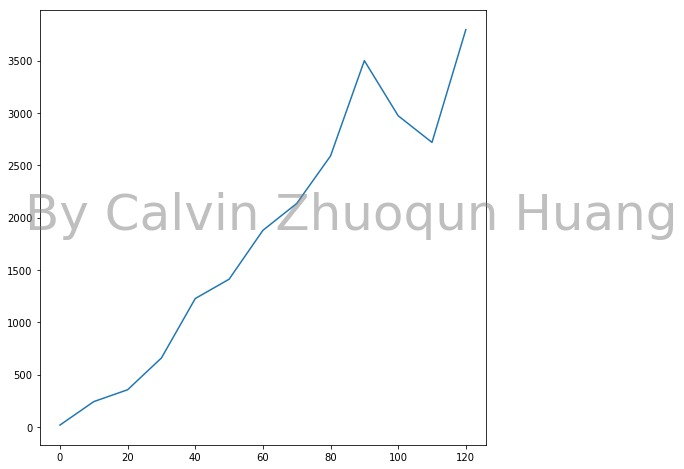

In [103]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_queries, y_linm_1)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

#### Task 2

In [104]:
y_linm_2 = []
for i in lin_n_queries:
    y_linm_2.append(time_run(5, 2, n_results, *get_subset(queries, i)))

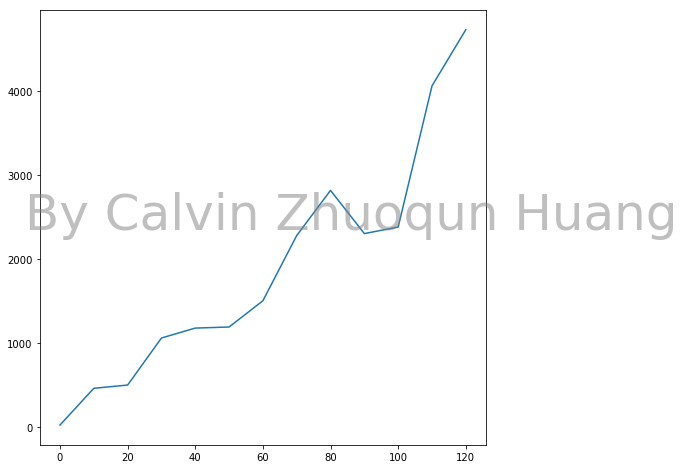

In [105]:
fig = plt.figure(figsize=[8,8])
plt.plot(lin_n_queries, y_linm_2)
fig.text(0.1, 0.5, "By Calvin Zhuoqun Huang",
         fontsize=50, color='gray',alpha=0.5)
plt.show()

# Now we make a integrated subplots

## Defining a subplot/full plot function

In [106]:
"""
make a subplot with argsubplot position and corresponding settings.
"""
def subplot_graph(x, y, argsubplot, title=None, xlabel=None, 
                  ylabel=None, xscale=None, yscale=None, *args):
    if type(argsubplot) is str:
        plt.subplot(argsubplot)
    else:
        plt.subplot(*argsubplot)
    plt.gca().plot(x, y, *args)
    if title: plt.gca().set_title(title)
    if xlabel: plt.gca().set_xlabel(xlabel)
    if ylabel: plt.gca().set_ylabel(ylabel)
    if xscale: plt.gca().set_xscale(xscale)
    if yscale: plt.gca().set_yscale(yscale)
    return plt.gca()


"""
return 
xs: list of array of x coordinates
ys: list of array of y coordinates
titles: list of titles
xlabels: list of xlabels
ylabels: list of xlabels
xscales: list of xscales
yscales: list of yscales
args: list of list of plotting styles.[[style1, style2],[style1, style2]]
watermark: watermark if you want to add one
figsize: size of the figure, best option will be [15, 15] or None
save: if specified, save the figure with such filename
"""
def full_plot(xs, ys, titles=None, xlabels=None, ylabels=None, 
              xscales=None, yscales=None, args=None, watermark=None,
              figsize=None, save=False):
    if figsize: fig = plt.figure(figsize=figsize)
    else: fig = plt.figure(figsize=[15, 15])
    
    width = 3
    height = len(xs) // width + 1
    
    for i in range(len(xs)):
        subplot_graph(xs[i], ys[i], [height, width, i + 1], titles[i],
                          xlabels[i], ylabels[i], xscales[i], yscales[i],
                          *(args[i]))
    
    if watermark:
        fig.text(0.1, 0.7, watermark,fontsize=50, 
                 color='gray',alpha=0.5)
        
    if save: plt.savefig(save)
    
    plt.show()

## Setting the variables used in function

In [110]:
xs = [exp_n_results,exp_n_results,lin_n_queries,
      exp_n_results,exp_n_results,lin_n_queries]

ys = [y_expk_1, y_expk_1, y_linm_1,
      y_expk_2, y_expk_2, y_linm_2]

titles = ["n_results linear plot with task 1",
          "n_results log plot with task 1",
          "n_queries linear plot with task 1",
          "n_results linear plot with task 2",
          "n_results log plot with task 2",
          "n_queries linear plot with task 2",]

xlabels = ["number of results", "number of results", "number of queries"] * 2
ylabels = ["time/ms"] * 6

xscales = [None, "log", None] * 2
yscales = [None, None, None] * 2

args = [["ro-"], ["ro-"], ["ro-"],
        ["b*-"], ["b*-"], ["b*-"],]

figsize = [15, 15]

# **************************************************************************
# Set this to ur own name
# **************************************************************************
watermark = "By Calvin Zhuoqun Huang"

save = "plot.png"

## Call the function

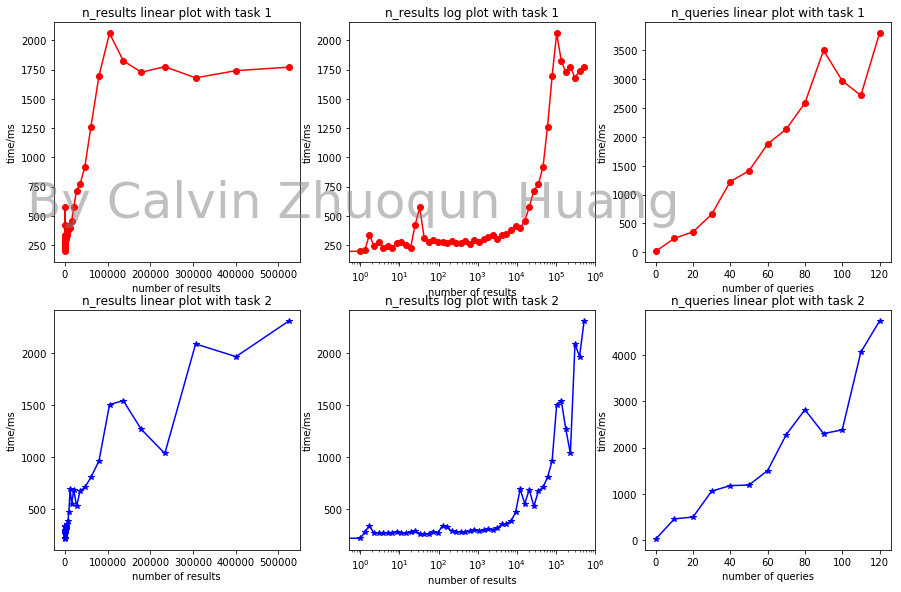

In [111]:
full_plot(xs, ys, titles, xlabels, ylabels, 
              xscales, yscales, args, watermark,
              figsize, save)

In [ ]:
# fig = plt.figure(figsize=[15, 15])
# subplot_graph(exp_n_results, y_expk_1, 231, "n_results linear plot with task 1", 
#               "number of results", "time/ms", 
#               None, None, "r*-")
# subplot_graph(exp_n_results, y_expk_1, 232, "n_results log plot with task 1", 
#               "number of results", "time/ms", 
#               "log", None, "r*-")
# subplot_graph(lin_n_queries, y_linm_1, 233, "n_queries linear plot with task 1", 
#               "number of queries", "time/ms", 
#               None, None, "r*-")
# subplot_graph(exp_n_results, y_expk_2, 234, "n_results linear plot with task 2", 
#               "number of results", "time/ms", 
#               None, None, "b*-")
# subplot_graph(exp_n_results, y_expk_2, 235, "n_results log plot with task 2", 
#               "number of results", "time/ms", 
#               "log", None, "b*-")
# subplot_graph(lin_n_queries, y_linm_2, 236, "n_queries linear plot with task 2", 
#               "number of results", "time/ms", 
#               None, None, "b*-")
# fig.text(0.1, 0.5, "Created by Calvin Zhuoqun Huang",
#          fontsize=50, color='gray',alpha=0.5)
# plt.savefig("plots.png")
# plt.show()
